# Analisti Fattoriale Confermativa {#sec-cfa}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

## Introduzione

In questo capitolo esamineremo la CFA per l'analisi dei modelli di misurazione con fattori comuni e indicatori continui. A differenza dell'analisi fattoriale esplorativa (EFA), nella CFA vengono analizzati modelli di misurazione vincolati. Ciò significa che il ricercatore specifica (1) il numero esatto di fattori; (2) il pattern dei carichi fattoriali, ossia la corrispondenza specifica tra i fattori e gli indicatori; e (3) la presenza di errori correlati, se presenti. 

La seconda caratteristica menzionata sopra implica che un indicatore satura solo sui fattori specificati dal ricercatore, e tutte le saturazioni incrociate di quell'indicatore su altri fattori sono fissate a zero. Sebbene sia possibile specificare un numero esatto di fattori nella EFA, la tecnica analizza modelli di misurazione non restrittivi, in cui ciascun indicatore satura su tutti i fattori (ossia tutte le saturazioni incrociate sono liberamente stimate). 

Un'altra differenza è che i modelli EFA con più fattori sono identificati solo dopo aver specificato un metodo di rotazione dei fattori, come obliqua (i fattori possono covariare) oppure ortogonale (i fattori sono non correlati). Poiché la CFA richiede un modello identificato, non c'è una fase di rotazione e di solito è permesso ai fattori di covariare. 

Nell'ambito dei requisiti per l'identificazione, è possibile stimare errori correlati nella CFA, ma è più difficile ottenere questo risultato nella EFA. Pertanto, la tecnica della CFA supporta meglio l'analisi delle strutture di covarianza degli errori rispetto alla EFA.

In [1]:
source("../../code/_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semTools")
})

## Limitazioni dell'approccio fattoriale

L'approccio classico dell'analisi fattoriale (EFA più rotazione fattoriale) ha rivelato avere diversi limiti. Nella ricerca iniziale, dibattiti teorici importanti, come il numero di fattori dell'intelligenza o della personalità, erano basati sui risultati di diverse rotazioni fattoriali. Questi dibattiti si sono rivelati essere semplici speculazioni, poiché conclusioni diverse potevano essere supportate a seconda dell'interpretazione dei dati. Per esempio, il dibattito tra Eysenck e Cattell sul numero di fattori della personalità (due o sedici) dipendeva dall'uso di rotazioni ortogonali o oblique sugli stessi dati.

Nella seconda metà del XX secolo, c'era una generale insoddisfazione verso l'analisi fattoriale a causa della sua apparente capacità di adattarsi a quasi qualsiasi soluzione. Furono raccomandati criteri rigorosi per il suo uso, come la necessità di grandi campioni, che spesso rendevano l'analisi impraticabile a quei tempi. Inoltre, furono introdotti vincoli relativi alle ipotesi del modello e al requisito che le variabili nella matrice di correlazione avessero varianze equivalenti, creando problemi pratici significativi, specialmente con dati binari spesso usati nei test psicometrici.

Solo con l'introduzione di metodi psicometrici moderni, come l'analisi fattoriale confermativa (CFA) discussa in questo capitolo e la Teoria di Risposta all'Item (discussa in una sezione successiva), questi problemi sono stati risolti. 

## EFA vs. CFA: Confronto tra Analisi Fattoriale Esplorativa e Confermativa

### Fondamenti Comuni e Differenze

Sia l'Analisi Fattoriale Esplorativa (EFA) che quella Confermativa (CFA) si basano sul modello dei fattori comuni. Entrambe le tecniche presuppongono che la varianza degli indicatori osservati possa essere suddivisa in varianza comune e varianza unica. La varianza comune è quella condivisa tra gli indicatori e sottende le covarianze osservate, mentre la varianza unica comprende sia la varianza specifica delle variabili che l'errore di misurazione. I fattori estratti, detti fattori comuni, rappresentano le variabili latenti costruite da questa varianza comune.

Nell'EFA, la struttura dei fattori è indeterminata e viene esplorata senza ipotesi a priori riguardo al numero o alla natura dei fattori. L'EFA è quindi particolarmente utile nelle fasi iniziali di ricerca, quando la teoria è poco sviluppata o si sospetta la presenza di fattori inaspettati.

Al contrario, la CFA si basa su un modello di fattori predefinito, che specifica a priori quali indicatori sono associati a ciascun fattore, rendendola idonea per confermare teorie esistenti o per validare strutture fattoriali precedentemente esplorate. In CFA, i carichi incrociati (indicatori che caricano su più di un fattore) sono generalmente vincolati a zero, stabilendo una relazione diretta e specifica tra fattori e indicatori.

### Indeterminatezza Fattoriale

Un problema ricorrente in entrambe le tecniche è l'indeterminatezza fattoriale, dove i fattori comuni non possono essere definiti in modo univoco dai loro indicatori a causa della natura approssimativa delle stime. Questo si manifesta sia in EFA, con l'indeterminatezza della rotazione, che in CFA, dove l'analisi potrebbe non replicarsi in nuovi campioni a causa dell'uso dei medesimi dati per verificare il modello.

### Indeterminatezza dei Punteggi Fattoriali

Un'altra complicazione è l'indeterminatezza dei punteggi fattoriali, che si verifica quando esistono infinite soluzioni valide per i punteggi fattoriali a partire dagli indicatori. Questo comporta che diversi metodi possono produrre ordinamenti differenti dei casi, un problema noto come indeterminatezza dei punteggi fattoriali (Grice, 2001).

### Rotazione e Specificazione del Modello

La EFA può presentare ambiguità a causa dell'infinita quantità di configurazioni dei carichi fattoriali che potrebbero adattarsi ai dati, un fenomeno meno pronunciato nella CFA dove la specifica del modello è più rigida.

### Applicazioni Pratiche

L'EFA è spesso preferita in nuovi ambiti di ricerca, dove i fattori potrebbero non essere ben definiti, mentre la CFA è utilizzata per confermare le strutture fattoriali in studi di validazione o in seguito a revisioni di test esistenti.

### Problemi con l'Uso Combinato di EFA e CFA

Si noti che l'applicazione della CFA immediatamente dopo la EFA nello stesso campione può essere problematica. Talvolta, l'uso congiunto non verifica né conferma i risultati dell'EFA. La restrittività dei modelli CFA, con i carichi incrociati impostati a zero, può portare a risultati che non sono coerenti con i dati analizzati nell'EFA.

### Nuove Approcci Intermedi

Metodi come l'Analisi Strutturale Esplorativa (ESEM) offrono un approccio ibrido che combina la flessibilità dell'EFA con alcuni degli aspetti confirmatori della CFA. Questo permette una maggiore precisione nel testare l'adattamento del modello, pur mantenendo la capacità di esplorare nuove strutture fattoriali.

## Raccomandazioni per la Selezione degli Indicatori nell'Analisi Fattoriale

La selezione accurata degli indicatori è cruciale per il successo dell'analisi fattoriale, sia essa Esplorativa (EFA) o Confermativa (CFA). Le linee guida suggerite da Fabrigar e Wegener (2012) e Little et al. (1999), come riassunto in @kline2023principles, enfatizzano i seguenti punti chiave:

1. **Definizione dei Concetti Teorici**: È essenziale articolare i concetti teorici in modo dettagliato per delineare chiaramente ogni dominio di interesse. Ad esempio, se lo studio riguarda le dimensioni dell'ansia, è importante riferirsi a letteratura teorica ed empirica che discute vari aspetti come ansia di stato, ansia di tratto e ansia sociale.

2. **Scelta degli Indicatori**: Gli indicatori selezionati dovrebbero coprire adeguatamente i domini d'interesse senza affidarsi esclusivamente allo stesso metodo di misurazione, come i questionari di autovalutazione, per ridurre la varianza dovuta a metodi comuni. L'impiego di modelli CFA specializzati può aiutare a stimare questi effetti del metodo.

3. **Guida Teorica o Empirica Forte**: Se esiste una solida base teorica o empirica, gli indicatori omogenei sono preferibili poiché forniscono stime più precise e meno distorte, specialmente in analisi di tipo più confermativo.

4. **Analisi di Indicatori Meno Omogenei**: Se la guida teorica è debole, può essere vantaggioso esaminare un insieme di indicatori meno omogenei che coprono un'ampia gamma del dominio d'interesse. Ciò evita di basarsi su approssimazioni che potrebbero non riflettere pienamente i concetti chiave.

5. **Uso di Indicatori di Qualità Psicometrica Inferiore**: Anche gli indicatori con minore qualità psicometrica possono essere utili se coprono ampiamente il costrutto, generano punteggi che riflettono ampie differenze individuali e sono analizzati attraverso metodi più confermativi.

6. **Problemi Tecnici**: L'analisi potrebbe incontrare problemi come i casi Heywood o la mancata convergenza se alcuni fattori hanno un numero insufficiente di indicatori, specialmente in campioni piccoli. Un numero sicuro minimo di indicatori per ogni fattore previsto è di circa 3-5. Tuttavia, in alcuni casi, potrebbe essere vantaggioso utilizzare meno indicatori per fattore se questi sono psicometricamente solidi.

Hayduk e Littvay (2012) hanno sottolineato che non è sempre preferibile avere più indicatori per fattore; in certi contesti, un singolo indicatore ben scelto può essere sufficiente. Se gli indicatori sono altamente ridondanti, non aggiungono informazioni significative. L'idea di una "regola d'oro" di 3-5 indicatori per fattore è una guida generale, ma la scelta dovrebbe essere basata sulle ipotesi specifiche di ricerca piuttosto che su una regola arbitraria.

## Fondamenti dei Modelli di Base nella CFA

I modelli di base nella Confermative Factor Analysis (CFA) con più fattori sono caratterizzati da specifiche fondamentali che garantiscono una misurazione precisa delle variabili latenti. Ecco una sintesi delle caratteristiche principali di tali modelli:

1. **Relazione tra Indicatori e Fattori**: Ogni indicatore è una variabile continua influenzata da due principali componenti: un fattore comune, che rappresenta la variabile latente che l'indicatore è inteso a misurare, e la varianza unica. Quest'ultima include sia l'errore di misurazione casuale sia la varianza specifica non spiegata dal fattore, entrambi rappresentati dal termine di errore.

2. **Indipendenza dei Termini di Errore**: I termini di errore sono assunti come indipendenti l'uno dall'altro e dai fattori. Ciò implica l'assenza di confondenti non misurati per qualsiasi coppia di indicatori e l'indipendenza delle cause omesse dai fattori.

3. **Linearità e Covarianza**: Le relazioni all'interno del modello sono lineari e i fattori possono covariare, il che significa che non esistono effetti causali diretti tra i fattori.

Queste caratteristiche definiscono la misurazione unidimensionale, sottolineando che ciascun indicatore è pensato per misurare una sola dimensione e non condivide varianza con altri indicatori una volta controllati i fattori comuni. Tuttavia, è anche possibile specificare modelli CFA multidimensionali, dove alcuni indicatori possono caricare su più di un fattore o dove coppie di termini di errore possono essere correlati.

Inoltre, esistono metodi specializzati per analizzare relazioni non lineari tra fattori e indicatori continui, o tra i fattori stessi, come descritto da Amemiya e Yalcin (2001). Le relazioni tra indicatori categorici e fattori sono intrinsecamente non lineari, e questi scenari sono trattati nel CFA categorico.

Un esempio di modello CFA di base con due fattori e sei indicatori viene presentato di seguito, dove tutti i carichi incrociati sono fissati a zero [@kline-14-1-fig]. Per esempio, il fattore B non ha un effetto causale diretto sull'indicatore X1, il quale è misurato da un altro fattore (A). Tuttavia, ciò non significa che X1 e il fattore B siano completamente scorrelati. La struttura del modello permette a X1 di covariare con B poiché B è correlato con A, che è una causa di X1 (l'altra causa è E1, il termine di errore di X1). In modo simile, si prevede che gli indicatori X1 e X4 covarino poiché sono influenzati dai fattori A e B, rispettivamente, i quali sono correlati.

Le costanti di scala, indicate come (1) nel modello, definiscono le metriche per le variabili non misurate, inclusi i fattori comuni e i termini di errore degli indicatori, stabilendo così una base uniforme per la misurazione nel modello CFA.

::: {#fig-kline_14_1}
![](../../figures/kline_14_1.png){width="80%"}

Modello di analisi fattoriali confermativa con due fattori comuni e sei indicatori. (Figura tratta da @kline2023principles)
:::

## Scalatura dei Fattori e Inclusione delle Covariate nei Modelli CFA di Base

Nella rappresentazione di base dei modelli Confermative Factor Analysis (CFA), la scalatura dei fattori viene spesso eseguita utilizzando il metodo della variabile di riferimento, conosciuto anche come metodo della variabile marker o approccio di identificazione del carico di riferimento (Newsom, 2015). In questo approccio, un vincolo di *Unit Loading Identification* (ULI) è applicato al carico di un indicatore per ciascun fattore. Per esempio, nel modello illustrato, il carico di $X1$ sul fattore $A$ è fissato a 1.0, stabilendo così la varianza del fattore $A$ sulla base della varianza comune dell'indicatore $X1$, che funge da variabile di riferimento per $A$. Analogamente, la varianza del fattore $B$ è calibrata utilizzando $X4$ come variabile marker.

Quando più indicatori per lo stesso fattore presentano precisione equivalente e nessuno di essi è considerato particolarmente rappresentativo del concetto sottostante, la scelta dell'indicatore come variabile di riferimento diventa generalmente arbitraria. Questa selezione non influisce solitamente sull'adattamento globale del modello, sulla soluzione standardizzata, o sulle stime delle varianze di errore dell'indicatore nelle soluzioni non standardizzate. Le saturazioni fisse a 1.0 per le variabili di riferimento rimangono invariate nelle soluzioni non standardizzate e non sono soggette a test di significatività, poiché sono considerate costanti.

Un potenziale svantaggio di questo metodo è l'assenza di test di significatività per le saturazioni fisse, il che può essere limitante se si desidera valutare la significatività di tutte le saturazioni. Metodi alternativi per scalare i fattori, che non richiedono la selezione di variabili di riferimento, saranno discussi nelle sezioni successive.

Nei modelli CFA di base, tutti i fattori sono considerati variabili esogene, il che significa che sono liberi di variare e covariare indipendentemente l'uno dall'altro. Tuttavia, è possibile includere variabili esterne, dette covariate, che si presume possano influenzare i fattori comuni. Ad esempio, l'età dei partecipanti potrebbe essere vista come una covariata che influisce sui fattori comuni in un modello CFA.

L'inclusione di covariate trasforma i fattori comuni da variabili esogene a endogene, implicando che non sono più completamente liberi di variare in modo indipendente, ma possono essere direttamente influenzati dalle covariate. Questo richiede l'aggiunta di termini di disturbo nei fattori comuni per rappresentare l'effetto diretto delle covariate su di essi, integrando così l'effetto delle variabili esterne nel modello CFA.

### Parametri del Modello nella CFA

In un modello CFA con indicatori continui, quando le medie delle variabili non sono considerate, i parametri liberi includono varianze, covarianze di variabili esogene e gli effetti diretti (carichi) sulle variabili endogene. Ad esempio, analizzando il modello di base illustrato in figura, i parametri liberi possono essere suddivisi come segue:

1. **Varianze**: Comprendono le varianze di due fattori e sei termini di errore associati agli indicatori, per un totale di otto varianze.
2. **Covarianza**: È presente una covarianza tra i due fattori.
3. **Effetti Diretti (Carichi)**: Quattro carichi fattoriali rappresentano gli effetti diretti dei fattori sugli indicatori, specificamente per gli indicatori X2, X3, X5 e X6. Questi carichi non sono fissati, a differenza di quelli usati per scalare i fattori.

Sommando questi parametri, il totale dei parametri liberi nel modello è 13. Con $v = 6$ variabili osservate, il numero totale di osservazioni statisticamente indipendenti, calcolato come $6(7)/2$, è 21. Di conseguenza, i gradi di libertà per il modello presentato sono calcolati sottraendo i parametri liberi dalle osservazioni indipendenti, risultando in $21 - 13 = 8$ gradi di libertà.

#### Requisiti di Identificazione: Necessari ma Non Sufficienti per i Modelli di CFA

Per assicurare che un modello di Confermative Factor Analysis (CFA) sia correttamente specificato e possa essere utilizzato per trarre conclusioni valide, è fondamentale soddisfare alcuni requisiti di identificazione essenziali. Questi requisiti sono necessari ma non sempre sufficienti; cioè, la loro soddisfazione non garantisce automaticamente l'identificazione completa del modello.

1. **Gradi di Libertà (dfM) Maggiori o Uguali a Zero**:
   - **Calcolo**: I gradi di libertà di un modello CFA si determinano sottraendo il numero di parametri liberi (come varianze, covarianze, e carichi fattoriali) dal numero totale di osservazioni indipendenti disponibili, solitamente le varianze e covarianze degli indicatori.
   - **Significato**: Avere gradi di libertà positivi indica che ci sono sufficienti dati per stimare i parametri del modello e verificare il suo adattamento. Un modello con zero gradi di libertà è "saturato" e si adatterà perfettamente ai dati, ma non fornirà validazione ulteriore.
   - **Importanza**: Mantenere dfM ≥ 0 è cruciale per evitare la sottospecificazione del modello, che potrebbe condurre a stime inaccurate e conclusioni fuorvianti.

2. **Scalatura Corretta di Ogni Variabile Non Misurata**:
   - **Necessità**: È essenziale scalare ogni variabile latente, come i fattori, per definirne l'unità di misura. Senza una scalatura adeguata, parametri come i carichi fattoriali rimarrebbero indeterminati.
   - **Metodi**: La scalatura può essere effettuata in vari modi, come fissando il carico di un indicatore per fattore a 1.0 (metodo della variabile di riferimento), fissando la varianza del fattore a un valore preciso, tipicamente 1.0 (metodo della standardizzazione della varianza), o applicando vincoli alle stime delle saturazioni fattoriali (metodo di codifica degli effetti).

In sintesi, pur essendo fondamentale soddisfare questi requisiti per stabilire una base identificabile e interpretabile per un modello CFA, l'identificazione completa del modello può richiedere considerazioni aggiuntive legate alla struttura specifica e alle ipotesi teoriche che sottendono al modello.

::: {#fig-kline_14_2}
![](../../figures/kline_14_2.png){width="80%"}

Scalatura dei fattori nel metodo della variabile di riferimento con vincoli di identificazione del carico unitario (ULI) (a), metodo di standardizzazione della variabile con vincoli di identificazione della varianza unitaria (UVI) (b) e metodo di codifica degli effetti con vincoli di identificazione della codifica degli effetti (ECI) (a + b + c)/3 = (d + e + f)/3 = 1.0 (c). (Figura tratta da @kline2023principles)
:::

#### Requisiti Sufficienti Aggiuntivi per l'Identificazione nei Modelli CFA

Oltre ai criteri base, esistono requisiti addizionali che favoriscono l'identificazione adeguata nei modelli di Confermative Factor Analysis (CFA):

1. **Regola dei Tre Indicatori per i Modelli a Singolo Fattore**: Affinché un modello CFA con un solo fattore sia pienamente identificabile, è necessario che disponga di almeno tre indicatori. Questo è dovuto al fatto che con solamente due indicatori non si dispone di sufficiente informazione per separare accuratamente la varianza del fattore e i suoi carichi specifici dagli errori di misurazione. Un modello con esattamente tre indicatori ha zero gradi di libertà, il che significa che si adatterà perfettamente ai dati ma non permetterà ulteriori test o validazioni. Per garantire gradi di libertà positivi (dfM > 0) e consentire un'efficace validazione del modello, è consigliabile utilizzare almeno quattro indicatori.

2. **Regola dei Due Indicatori per i Modelli con Più Fattori**: Nei modelli CFA che coinvolgono più di un fattore, è essenziale che ogni fattore sia rappresentato da almeno due indicatori. Questa disposizione aiuta a definire chiaramente ogni fattore e a distinguerlo dagli altri fattori presenti nel modello. Tuttavia, i modelli che si limitano a due indicatori per fattore possono presentare problematiche, specialmente in campioni di dimensioni ridotte, poiché possono emergere instabilità nelle stime e complessità nell'interpretazione dei risultati.

Questi requisiti aggiuntivi sono fondamentali non solo per garantire che un modello CFA sia teoricamente valido (attraverso una corretta scalatura e definizione delle variabili latenti), ma anche per assicurare la sua utilità pratica, fornendo sufficienti gradi di libertà per consentire validazioni affidabili e interpretazioni significative del modello.

## Oltre i Requisiti Minimi di Identificazione

Nel contesto della Confermative Factor Analysis (CFA), i requisiti di identificazione sono considerati necessari ma non sufficienti. Questo significa che, anche se il loro soddisfacimento è cruciale per una corretta stima dei parametri del modello, essi non garantiscono da soli che il modello sia il migliore possibile o pienamente identificato in termini di struttura e fondamenti teorici. Questa distinzione sottolinea l'importanza di andare oltre i criteri minimi per esplorare l'adeguatezza complessiva e la validità del modello all'interno del suo contesto teorico e applicativo.

### Perché sono Necessari

1. **Gradi di Libertà (dfM) Maggiori o Uguali a Zero**: Avere gradi di libertà non negativi è essenziale per assicurare che ci siano abbastanza dati per stimare i parametri del modello. Se i gradi di libertà sono negativi, indica che ci sono troppi parametri da stimare rispetto alle informazioni disponibili, il che rende il modello inidentificabile.

2. **Scalatura Corretta di Ogni Variabile Non Misurata**: La scalatura delle variabili latenti consente di stabilire un'unità di misura chiara, rendendo possibile l'interpretazione dei parametri come i carichi fattoriali. Senza una scalatura appropriata, i parametri del modello rimarrebbero indeterminati e potrebbero condurre a conclusioni ambigue.

### Perché Non Sono Sufficienti

Nonostante la soddisfazione di questi requisiti renda il modello tecnicamente identificabile e stima i parametri, ci sono altre considerazioni che possono influenzare l'adeguatezza del modello:

- **Adeguamento del Modello**: Anche se un modello ha gradi di libertà positivi e le variabili sono correttamente scalate, potrebbe non adattarsi bene ai dati. L'adeguatezza del modello è valutata attraverso statistiche di fit come il Chi-quadrato, RMSEA, CFI, e altri. Un modello può soddisfare i requisiti di identificazione ma avere un cattivo fit.

- **Validità Teorica**: Un modello può essere tecnicamente corretto ma non catturare accuratamente le relazioni teoriche tra le variabili. La costruzione del modello deve essere guidata da una solida base teorica che giustifica le relazioni tra i fattori e gli indicatori.

### Esempio Pratico

Immaginiamo un modello CFA per misurare due concetti psicologici, come l'ansia e la depressione, con tre indicatori per ciascun fattore. Anche se il modello potrebbe avere gradi di libertà sufficienti e ogni fattore è correttamente scalato con un indicatore con carico fissato a 1.0, potrebbero sorgere problemi:

- **Cross-loadings**: Gli indicatori per l'ansia potrebbero anche avere carichi significativi sulla depressione, il che non è catturato nel modello perché ogni indicatore è supposto misurare un solo fattore. Questo problema di validità del modello non è rilevato dai semplici criteri di identificazione.

- **Adattamento del Modello**: Il modello potrebbe mostrare un cattivo adattamento ai dati, suggerendo che la struttura ipotizzata dei fattori e degli indicatori non riflette accuratamente le relazioni tra le variabili osservate.

In conclusione, mentre i requisiti di identificazione sono critici per la fattibilità tecnica di un modello CFA, non garantiscono di per sé che il modello sia il migliore possibile o che rifletta accuratamente le dinamiche sottostanti. Ulteriori analisi e valutazioni sono necessarie per assicurare che il modello sia sia identificabile che valido.

#### Altri Metodi per la Scalatura dei Fattori nei Modelli di CFA

La scalatura dei fattori è fondamentale per garantire una corretta identificazione e interpretazione dei fattori in un modello di Confermative Factor Analysis (CFA). Oltre al comune metodo della variabile di riferimento, esistono altri due approcci principali:

1. **Metodo di Standardizzazione della Varianza (Variance Standardization Method)**:
   
   - **Descrizione**: Questo metodo fissa la varianza di ciascun fattore a 1.0, un approccio noto come *unit variance identification* (UVI).
   - **Implicazioni**: La standardizzazione dei fattori implica che le loro varianze non sono stimate come parametri liberi. Invece, le covarianze tra i fattori sono liberamente stimate e interpretate come correlazioni di Pearson.
   - **Carichi degli Indicatori**: Tutti i carichi degli indicatori sono considerati parametri liberi, il che permette di testarne la significatività statistica attraverso i loro errori standard.
   - **Vantaggi e Limitazioni**: Il principale vantaggio di questo metodo è la sua semplicità e l'assenza di necessità di selezionare una variabile di riferimento. Tuttavia, è generalmente più adatto per modellare fattori esogeni.

2. **Metodo di Codifica degli Effetti (Effects Coding Method)**:
   
   - **Funzionamento**: A differenza dei metodi precedenti, questo non richiede la selezione di una variabile di riferimento e non implica la standardizzazione dei fattori.
   - **Vincolo di Codifica degli Effetti (ECI)**: Si impone che la media dei carichi fattoriali per gli indicatori di un dato fattore sia uguale a 1.0. Questo obbliga il software SEM a trovare una combinazione ottimale di carichi che, in media, risultino in 1.0.
   - **Stima della Varianza del Fattore**: La varianza del fattore viene stimata come la varianza comune media calcolata attraverso tutti gli indicatori, considerando il loro contributo individuale alla misurazione del fattore.
   - **Vantaggi**: Questo metodo consente che tutti gli indicatori contribuiscano equamente alla scalatura del loro fattore comune. È particolarmente utile in studi longitudinali o quando si confrontano gruppi diversi, dato che le varianze dei fattori possono fornire informazioni preziose.

Ogni metodo di scalatura presenta vantaggi specifici e limitazioni, che devono essere considerati in base agli obiettivi della ricerca e alle caratteristiche del modello CFA:

- Il **Metodo di Standardizzazione della Varianza** offre una soluzione semplice e diretta, ma potrebbe non essere sempre il più appropriato, specialmente in contesti dove i fattori sono endogeni.
- Il **Metodo di Codifica degli Effetti** è vantaggioso per stabilire una scalatura equilibrata e stabile dei fattori, utile soprattutto in studi comparativi o longitudinali.

La scelta del metodo di scalatura dovrebbe essere guidata dalle necessità specifiche della ricerca, dalla struttura dei dati e dalle ipotesi teoriche del modello di CFA utilizzato.

## Esempio di CFA per un Modello di Abilità Cognitive: La Kaufman Assessment Battery for Children

La *Kaufman Assessment Battery for Children* (KABC-I) è un test di valutazione delle abilità cognitive, somministrato individualmente a bambini dagli 2 anni e mezzo ai 12 anni e mezzo (Kaufman & Kaufman, 1983). Questo strumento è stato progettato per misurare due distinti fattori cognitivi attraverso otto indicatori.

I primi tre compiti del test sono orientati all'elaborazione sequenziale e richiedono ai bambini di ricordare e ripetere stimoli uditivi (come nel Richiamo Numerico e nell'Ordine delle Parole) o visivi (come nei Movimenti della Mano) in un ordine specifico. Questi compiti sono pensati per riflettere la capacità di memoria a breve termine e di sequenziamento delle informazioni.

Gli altri cinque compiti, che includono la Chiusura Gestaltica e la Serie Fotografica, sono ritenuti misurare un tipo di ragionamento più olistico e meno sequenziale, associato all'elaborazione simultanea. Questi compiti valutano la capacità di integrare e sintetizzare le informazioni visuo-spaziali in un contesto più ampio, spesso indipendentemente dall'ordine in cui le informazioni sono presentate.

Keith (1985) ha proposto delle denominazioni alternative per i fattori misurati dalla KABC-I, suggerendo i termini "memoria a breve termine" per sostituire "elaborazione sequenziale" e "ragionamento visuo-spaziale" per "elaborazione simultanea". Queste etichette alternative riflettono una prospettiva leggermente diversa sui tipi di competenze cognitive che i due fattori intendono misurare.

Questo modello di CFA, utilizzando i compiti della KABC-I come indicatori, fornisce una struttura utile per comprendere come diversi tipi di elaborazione cognitiva possano essere categorizzati e valutati nei contesti educativi e diagnostici.

In [2]:
# input the correlations in lower diagnonal form
kabcLower.cor <- "
 1.00
 .39 1.00
 .35  .67 1.00
 .21  .11  .16 1.00
 .32  .27  .29  .38 1.00
 .40  .29  .28  .30  .47 1.00
 .39  .32  .30  .31  .42  .41 1.00
 .39  .29  .37  .42  .58  .51  .42 1.00 "

# name the variables and convert to full correlation matrix
# hm, hand movements; nr, number recall; wo, word order; gc, gestalt closure;
# tr, triangles; sm, spatial memory; ma, matrix analogies; ps, photo series
kabc.cor <- lavaan::getCov(kabcLower.cor, names = c(
    "hm", "nr", "wo",
    "gc", "tr", "sm", "ma", "ps"
))
# display correlations
kabc.cor

,hm,nr,wo,gc,tr,sm,ma,ps
hm,1.00,0.39,0.35,0.21,0.32,0.40,0.39,0.39
nr,0.39,1.00,0.67,0.11,0.27,0.29,0.32,0.29
wo,0.35,0.67,1.00,0.16,0.29,0.28,0.30,0.37
gc,0.21,0.11,0.16,1.00,0.38,0.30,0.31,0.42
tr,0.32,0.27,0.29,0.38,1.00,0.47,0.42,0.58
sm,0.40,0.29,0.28,0.30,0.47,1.00,0.41,0.51
ma,0.39,0.32,0.30,0.31,0.42,0.41,1.00,0.42
ps,0.39,0.29,0.37,0.42,0.58,0.51,0.42,1.00


In [3]:
# add the standard deviations and convert to covariances
kabc.cov <- lavaan::cor2cov(kabc.cor, sds = c(3.40, 2.40, 2.90, 2.70, 2.70, 4.20, 2.80, 3.00))

# display covariances
kabc.cov

,hm,nr,wo,gc,tr,sm,ma,ps
hm,11.5600,3.1824,3.4510,1.9278,2.9376,5.7120,3.7128,3.978
nr,3.1824,5.7600,4.6632,0.7128,1.7496,2.9232,2.1504,2.088
wo,3.4510,4.6632,8.4100,1.2528,2.2707,3.4104,2.4360,3.219
gc,1.9278,0.7128,1.2528,7.2900,2.7702,3.4020,2.3436,3.402
tr,2.9376,1.7496,2.2707,2.7702,7.2900,5.3298,3.1752,4.698
sm,5.7120,2.9232,3.4104,3.4020,5.3298,17.6400,4.8216,6.426
ma,3.7128,2.1504,2.4360,2.3436,3.1752,4.8216,7.8400,3.528
ps,3.9780,2.0880,3.2190,3.4020,4.6980,6.4260,3.5280,9.000


::: {#fig-kline_14_3}
![](../../figures/kline_14_3.png){width="99%"}

Modello CFA per la Kaufman Assessment Battery for Children. (Figura tratta da @kline2023principles)
:::

#### Modello a Fattore Singolo

Nell'ambito della CFA, se il modello bersaglio ha due o più fattori, spesso il primo modello analizzato è un modello a fattore singolo. Se non si può rigettare un modello a fattore singolo, non ha molto senso valutare modelli con più fattori.

Specifichiamo il modello ad un fattore comune nella sintassi di `lavaan`.

In [5]:
# single factor (general ability)
# indicator hm automatically specified as reference variable
kabc1.model <- "
    General =~ hm + nr + wo + gc + tr + sm + ma + ps 
"

Adattiamo il modello ai dati.

In [6]:
# variances calculated with N in the denominator, not N - 1
kabc1 <- lavaan::sem(kabc1.model, sample.cov = kabc.cov, sample.nobs = 200)

Generiamo un modello di percorso.

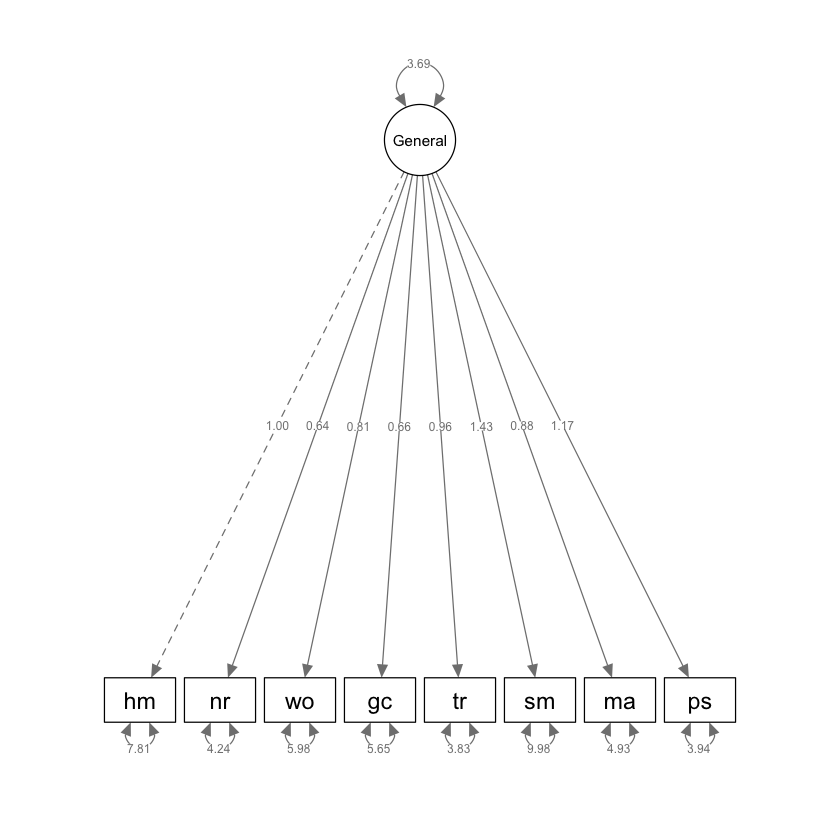

In [7]:
semPlot::semPaths(kabc1,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo la soluzione non standardizzata.

In [8]:
lavaan::parameterEstimates(kabc1) |> 
    print()

       lhs op     rhs   est    se     z pvalue ci.lower ci.upper
1  General =~      hm 1.000 0.000    NA     NA    1.000    1.000
2  General =~      nr 0.636 0.111 5.708      0    0.418    0.854
3  General =~      wo 0.805 0.136 5.910      0    0.538    1.072
4  General =~      gc 0.659 0.123 5.361      0    0.418    0.900
5  General =~      tr 0.963 0.138 6.984      0    0.693    1.233
6  General =~      sm 1.433 0.211 6.796      0    1.019    1.846
7  General =~      ma 0.883 0.137 6.459      0    0.615    1.151
8  General =~      ps 1.166 0.159 7.324      0    0.854    1.478
9       hm ~~      hm 7.812 0.863 9.049      0    6.120    9.504
10      nr ~~      nr 4.240 0.456 9.294      0    3.345    5.134
11      wo ~~      wo 5.975 0.650 9.195      0    4.702    7.249
12      gc ~~      gc 5.652 0.599 9.432      0    4.478    6.827
13      tr ~~      tr 3.831 0.468 8.186      0    2.914    4.748
14      sm ~~      sm 9.979 1.179 8.463      0    7.668   12.290
15      ma ~~      ma 4.9

La saturazione non standardizzata per il compito "Movimenti della Mano" è stato fissato automaticamente a 1.0 per scalare il singolo fattore comune. Le istruzioni seguenti consentono di estrarre dall'output di `sem()` solo le informazioni relative alle saturazioni fattoriali.

In [9]:
parameterEstimates(kabc1, standardized = TRUE) %>%
    dplyr::filter(op == "=~") %>%
    dplyr::select(
        "Latent Factor" = lhs,
        Indicator = rhs,
        B = est,
        SE = se,
        Z = z,
        "p-value" = pvalue,
        Beta = std.all
    ) %>%
    knitr::kable(
        digits = 3, booktabs = TRUE, format = "markdown",
        caption = "Factor Loadings"
    )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|     Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|-----:|-------:|-----:|
|General       |hm        | 1.000| 0.000|    NA|      NA| 0.566|
|General       |nr        | 0.636| 0.111| 5.708|       0| 0.510|
|General       |wo        | 0.805| 0.136| 5.910|       0| 0.535|
|General       |gc        | 0.659| 0.123| 5.361|       0| 0.470|
|General       |tr        | 0.963| 0.138| 6.984|       0| 0.687|
|General       |sm        | 1.433| 0.211| 6.796|       0| 0.657|
|General       |ma        | 0.883| 0.137| 6.459|       0| 0.607|
|General       |ps        | 1.166| 0.159| 7.324|       0| 0.749|

Esaminiamo le misure di bontà di adattamento.

In [10]:
fitMeasures(kabc1, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

  chisq      df     cfi     tli   rmsea    srmr 
105.427  20.000   0.818   0.746   0.146   0.084 


Troviamo i residui grezzi, ovvero la differenza tra la matrice di *covarianza* osservata e quella predetta dal modello.

In [11]:
lavaan::residuals(kabc1, type = "raw") |>
    print()

$type
[1] "raw"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  0.820  0.000                                          
wo  0.462  2.751  0.000                                   
gc -0.513 -0.836 -0.711  0.000                            
tr -0.631 -0.519 -0.602  0.415  0.000                     
sm  0.397 -0.452 -0.863 -0.097  0.212  0.000              
ma  0.437  0.069 -0.199  0.186  0.022  0.131  0.000       
ps -0.345 -0.659 -0.263  0.550  0.530  0.229 -0.289  0.000



Specificando `type = "cor.bollen"` o `type = "cor"` otteniamo la differenza tra la matrice di *correlazione* osservata e quella predetta dal modello.

In [12]:
lavaan::residuals(kabc1, type = "cor.bollen") |>
    print()

$type
[1] "cor.bollen"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  0.101  0.000                                          
wo  0.047  0.397  0.000                                   
gc -0.056 -0.130 -0.091  0.000                            
tr -0.069 -0.080 -0.077  0.057  0.000                     
sm  0.028 -0.045 -0.071 -0.009  0.019  0.000              
ma  0.046  0.010 -0.025  0.025  0.003  0.011  0.000       
ps -0.034 -0.092 -0.030  0.068  0.066  0.018 -0.035  0.000



In alternativa, possiamo ottenere i residui standardizzati alla maniera di Mplus (`standardized.mplus`), che vengono calcolati utilizzando la seguente formula:

$$
    \text{Residuo Standardizzato} = \frac{\text{Cov. Osservata} - \text{Cov. Stimata}}{\sqrt{\text{Var. dell'Errore per X} \times \text{Var. dell'Errore per Y}}}, 
$$

dove:
- La covarianza osservata è il valore della covarianza tra due variabili nel set di dati.
- La covarianza stimata è la covarianza tra le stesse due variabili, come previsto dal modello SEM.
- La varianza dell'errore per la variabile X e Y sono le varianze degli errori per le due variabili in questione.

I residui standardizzati misurano quanto la relazione osservata tra due variabili si discosta da quella prevista dal modello, in unità standardizzate. Un valore vicino a zero indica che il modello si adatta bene ai dati per quella specifica relazione. Valori più grandi in valore assoluto suggeriscono un cattivo adattamento in quella specifica parte del modello.

In [13]:
lavaan::residuals(kabc1, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  2.062  0.000                                          
wo  1.026  6.218  0.000                                   
gc -1.231 -2.727 -1.952  0.000                            
tr -2.200 -2.364 -2.355  1.379  0.000                     
sm  0.723 -1.188 -1.995 -0.210  0.596  0.000              
ma  1.086  0.237 -0.601  0.544  0.089  0.313  0.000       
ps -1.241 -3.422 -1.037  1.833  2.178  0.675 -1.375  0.000



Il modello a fattore singolo mostra un rapporto elevato chi-quadro/df. Inoltre, i residui per questa analisi indicano che l'adattamento locale è scadente. Pertanto, il modello a fattore singolo per la KABC-I è rigettato.

#### Modello a Due Fattori

In una seconda analisi, adattiamo ai dati il modello a due fattori rappresentato nella {numref}`kline-14-3-fig`. 

In [14]:
kabc2_model <- "
    Sequent =~ hm + nr + wo
    Simultan =~ gc + tr + sm + ma + ps 
"

In [15]:
kabc2 <- lavaan::sem(kabc2_model, sample.cov = kabc.cov, sample.nobs = 200)

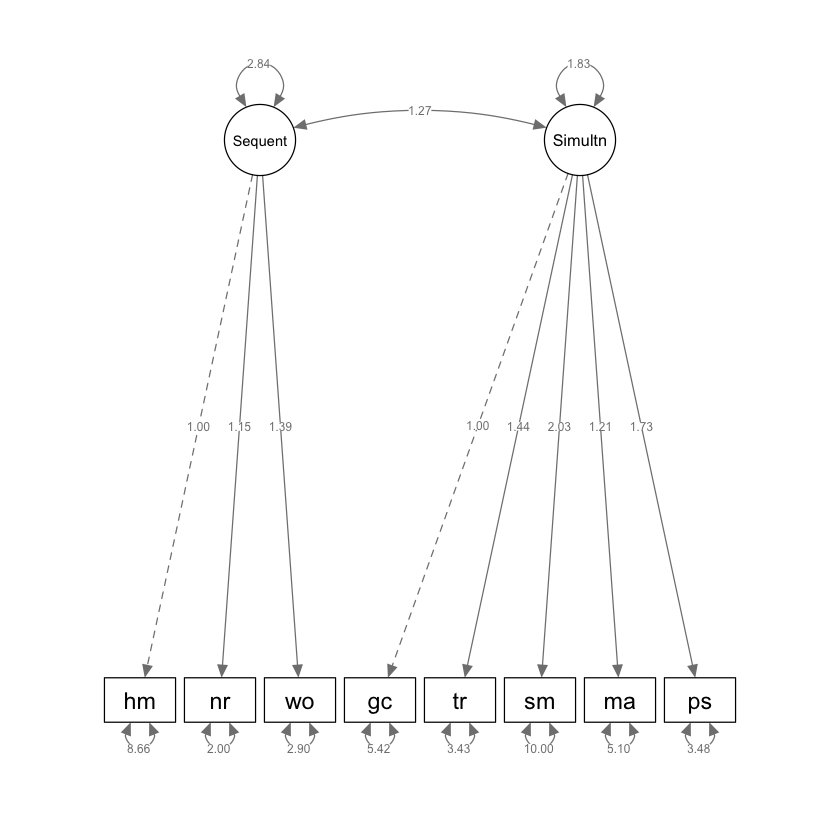

In [16]:
semPlot::semPaths(kabc2,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [17]:
lavaan::parameterEstimates(kabc2) |>
    print()

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper
1   Sequent =~       hm 1.000 0.000    NA     NA    1.000    1.000
2   Sequent =~       nr 1.147 0.181 6.341  0.000    0.792    1.501
3   Sequent =~       wo 1.388 0.219 6.340  0.000    0.959    1.817
4  Simultan =~       gc 1.000 0.000    NA     NA    1.000    1.000
5  Simultan =~       tr 1.445 0.227 6.352  0.000    0.999    1.890
6  Simultan =~       sm 2.029 0.335 6.062  0.000    1.373    2.685
7  Simultan =~       ma 1.212 0.212 5.717  0.000    0.797    1.628
8  Simultan =~       ps 1.727 0.265 6.521  0.000    1.208    2.246
9        hm ~~       hm 8.664 0.938 9.237  0.000    6.826   10.502
10       nr ~~       nr 1.998 0.414 4.831  0.000    1.188    2.809
11       wo ~~       wo 2.902 0.604 4.801  0.000    1.717    4.087
12       gc ~~       gc 5.419 0.585 9.261  0.000    4.272    6.566
13       tr ~~       tr 3.426 0.458 7.479  0.000    2.528    4.323
14       sm ~~       sm 9.997 1.202 8.320  0.000    7.642   12

In [18]:
standardizedSolution(kabc2)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.4967517,0.06185190,8.031309,8.881784e-16,0.3755242,0.6179792
Sequent,=~,nr,0.8070386,0.04626958,17.442098,0.000000e+00,0.7163519,0.8977253
Sequent,=~,wo,0.8082004,0.04624070,17.478118,0.000000e+00,0.7175703,0.8988305
Simultan,=~,gc,0.5029005,0.06088027,8.260485,2.220446e-16,0.3835774,0.6222236
Simultan,=~,tr,0.7264627,0.04412957,16.462040,0.000000e+00,0.6399703,0.8129550
Simultan,=~,sm,0.6560490,0.04959951,13.226925,0.000000e+00,0.5588358,0.7532623
Simultan,=~,ma,0.5878905,0.05485948,10.716298,0.000000e+00,0.4803679,0.6954131
Simultan,=~,ps,0.7817406,0.04012341,19.483401,0.000000e+00,0.7031001,0.8603810
hm,~~,hm,0.7532377,0.06145007,12.257719,0.000000e+00,0.6327978,0.8736777


In [19]:
fitMeasures(kabc2, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

 chisq     df    cfi    tli  rmsea   srmr 
38.325 19.000  0.959  0.939  0.071  0.072 


Un modello di analisi fattoriale confermativa (CFA) che utilizza un singolo fattore può essere visto come un caso specifico o un "sottoinsieme" di modelli CFA più complessi con due o più fattori che impiegano gli stessi indicatori e lo stesso schema di covarianza degli errori, se presente. Questa struttura gerarchica tra i modelli a singolo fattore e quelli multifattoriali implica che i ricercatori possono applicare il test del chi-quadro per confrontare direttamente l'adattamento di un modello CFA a singolo fattore con quello di modelli CFA a più fattori. In pratica, ciò permette di valutare se l'introduzione di fattori aggiuntivi migliora significativamente l'adattamento del modello ai dati rispetto a un modello più semplice a singolo fattore. Questo tipo di analisi è fondamentale per determinare la complessità ottimale del modello in base alla struttura sottostante dei dati. Sebbene questo argomento verrà approfondito successivamente, è importante anticipare qui l'utilizzo del test del rapporto di verosimiglianza, che consente di confrontare i modelli in maniera quantitativa.

In [20]:
lavTestLRT(kabc1, kabc2)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
kabc2,19,7592.082,7648.153,38.32476,NA,NA,NA,NA
kabc1,20,7657.183,7709.956,105.42664,67.10188,0.5748995,1,2.578323e-16


I risultati del test indicano che l'adattamento del modello con due fattori è statisticamente migliore rispetto a quello del modello a fattore singolo (il modello ad un fattore ha un valore $\chi^2$ superiore di 67.1 punti, con un grado di libertà). 

Anche se il test del rapporto tra verosimiglianze favorisce il modello a due fattori, possiamo notare che l'esame dei residui mostra un problema con l'indicatore `hm`.

In [21]:
lavaan::residuals(kabc2, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr -0.591  0.000                                          
wo -3.790  1.539  0.000                                   
gc  1.126 -2.329 -1.315     NA                            
tr  2.046 -1.558 -1.001  0.429  0.000                     
sm  3.464 -0.112 -0.355 -0.784 -0.267  0.000              
ma  3.505  1.129  0.727  0.323 -0.245  0.664  0.008       
ps  2.991 -2.002  0.524  0.910  0.677 -0.144 -1.978  0.000



Per affrontare questo problema, calcoliamo i *modification indices* che ci dicono quale parametro del modello ha l'effetto maggiore sulla misura di fit complessivo.

In [22]:
modindices(kabc2, sort = TRUE, maximum.number = 5)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,Simultan,=~,hm,20.097078,1.0539461,1.4275011,0.4209070,0.4209070
35,nr,~~,wo,20.097058,4.7406831,4.7406831,1.9685321,1.9685321
26,Simultan,=~,nr,7.013048,-0.5104555,-0.6913786,-0.2887972,-0.2887972
29,hm,~~,wo,7.012988,-1.7458372,-1.7458372,-0.3481696,-0.3481696
32,hm,~~,sm,4.847027,1.6094583,1.6094583,0.1729329,0.1729329


I risultati degli indici di modifica (MI) indicano che il misfit del modello è principalmente attribuibile alla fissazione a zero del carico tra l'indicatore `hm` e il fattore comune `Simulan`, nonché alla fissazione a zero della covarianza tra le componenti residue di `nr` e `wo`. Per migliorare l'adattamento del modello, si propone quindi di modificare questi aspetti, iniziando con il primo, ovvero riconsiderando il carico di `hm` sul fattore `Simulan`.

In [23]:
kabc3_model <- "
    Sequent =~ hm + nr + wo
    Simultan =~ hm + gc + tr + sm + ma + ps
"

In [24]:
kabc3 <- lavaan::sem(kabc3_model, sample.cov = kabc.cov, sample.nobs = 200)

In [25]:
lavaan::parameterEstimates(kabc3) |>
    print()

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper
1   Sequent =~       hm 1.000 0.000    NA     NA    1.000    1.000
2   Sequent =~       nr 2.285 0.777 2.941  0.003    0.762    3.808
3   Sequent =~       wo 2.767 0.941 2.939  0.003    0.922    4.612
4  Simultan =~       hm 1.000 0.000    NA     NA    1.000    1.000
5  Simultan =~       gc 1.014 0.255 3.979  0.000    0.515    1.514
6  Simultan =~       tr 1.457 0.329 4.427  0.000    0.812    2.101
7  Simultan =~       sm 2.103 0.483 4.354  0.000    1.157    3.050
8  Simultan =~       ma 1.259 0.298 4.229  0.000    0.675    1.842
9  Simultan =~       ps 1.752 0.391 4.486  0.000    0.987    2.518
10       hm ~~       hm 7.851 0.845 9.291  0.000    6.195    9.507
11       nr ~~       nr 1.899 0.487 3.896  0.000    0.944    2.854
12       wo ~~       wo 2.750 0.713 3.856  0.000    1.352    4.148
13       gc ~~       gc 5.444 0.585 9.297  0.000    4.296    6.591
14       tr ~~       tr 3.521 0.457 7.702  0.000    2.625    4

Il modello così modificato fornisce un buon adattamento ai dati.

In [26]:
fitMeasures(kabc3, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

 chisq     df    cfi    tli  rmsea   srmr 
18.108 18.000  1.000  1.000  0.005  0.035 


In [27]:
lavaan::residuals(kabc3, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  1.165  0.000                                          
wo -1.637  0.000  0.000                                   
gc -1.066 -1.919 -0.939  0.000                            
tr -1.710 -0.763 -0.247  0.603  0.000                     
sm  1.325  0.287  0.044 -0.867 -0.304  0.000              
ma  1.730  1.428  1.029  0.258 -0.298  0.338  0.000       
ps -0.512 -1.059  1.285  1.035  1.088 -0.361 -2.181  0.008



Eseguiamo il confronto tra questo terzo modello e il secondo.

In [28]:
lavTestLRT(kabc2, kabc3)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
kabc3,18,7573.864,7633.234,18.10764,NA,NA,NA,NA
kabc2,19,7592.082,7648.153,38.32476,20.21711,0.3099767,1,6.913179e-06


Il test del rapporto tra verosimiglianze favorisce il modello nel quale `hm` satura su entrambi i fattori comuni.

In [29]:
standardizedSolution(kabc3)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.2525852,0.08220770,3.072524,2.122564e-03,0.09146104,0.4137093
Sequent,=~,nr,0.8177224,0.05332037,15.336023,0.000000e+00,0.71321642,0.9222284
Sequent,=~,wo,0.8193490,0.05332364,15.365586,0.000000e+00,0.71483657,0.9238614
Simultan,=~,hm,0.3911086,0.07920465,4.937950,7.894795e-07,0.23587038,0.5463469
Simultan,=~,gc,0.4995366,0.06083478,8.211366,2.220446e-16,0.38030263,0.6187706
Simultan,=~,tr,0.7173667,0.04430392,16.191948,0.000000e+00,0.63053266,0.8042008
Simultan,=~,sm,0.6659828,0.04841875,13.754648,0.000000e+00,0.57108381,0.7608818
Simultan,=~,ma,0.5978172,0.05378964,11.113985,0.000000e+00,0.49239147,0.7032430
Simultan,=~,ps,0.7766255,0.03976264,19.531536,0.000000e+00,0.69869211,0.8545588


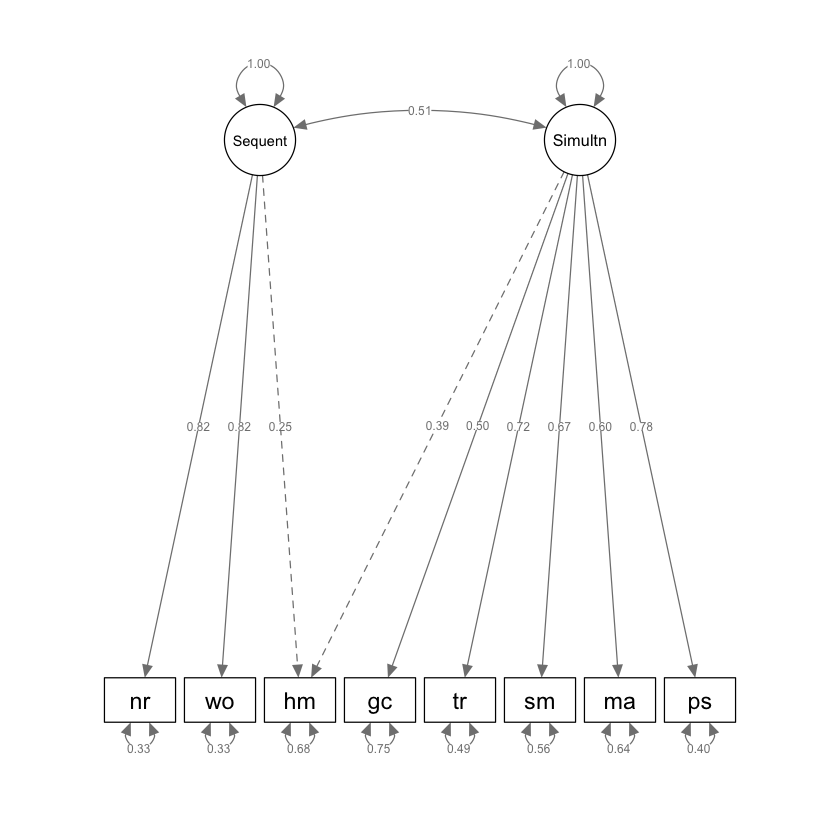

In [30]:
semPlot::semPaths(kabc3,
    what = "col", whatLabels = "std", style = "mx",
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Nei modelli precedenti, abbiamo adottato un metodo di scalatura dei fattori comuni che fissava la saturazione fattoriale di uno degli indicatori per ciascun fattore comune a 1.0 come riferimento. Ora, esploreremo un diverso approccio di scalatura che prevede la standardizzazione della varianza delle variabili latenti.

Per attuare questa procedura nel software `lavaan`, è necessario modificare la configurazione predefinita in cui la saturazione fattoriale del primo indicatore di ogni fattore comune è fissata a 1.0. Per fare ciò, useremo la sintassi `NA*` per indicare che la saturazione fattoriale del primo indicatore deve essere stimata. Questo si realizza inserendo `NA*` nell'istruzione che definisce la relazione tra le variabili latenti e gli indicatori (espresso tramite `=~`). Inoltre, è fondamentale specificare che la varianza delle variabili latenti sia fissata a 1.0, il che si attua mediante la sintassi `1*` nell'istruzione che stabilisce la varianza di ciascun fattore comune (`~~`).

In [32]:
kabc3alt_model <- "
    Sequent =~ NA*hm + nr + wo
    Simultan =~ NA*hm + gc + tr + sm + ma + ps

    Sequent ~~ 1*Sequent
    Simultan ~~ 1*Simultan
"

Adattiamo il modello così parametrizzato ai dati.

In [33]:
kabc3alt <- lavaan::sem(
    kabc3alt_model, sample.cov = kabc.cov, sample.nobs = 200, std.lv = TRUE
)

Esaminiamo la soluzione non standardizzata.

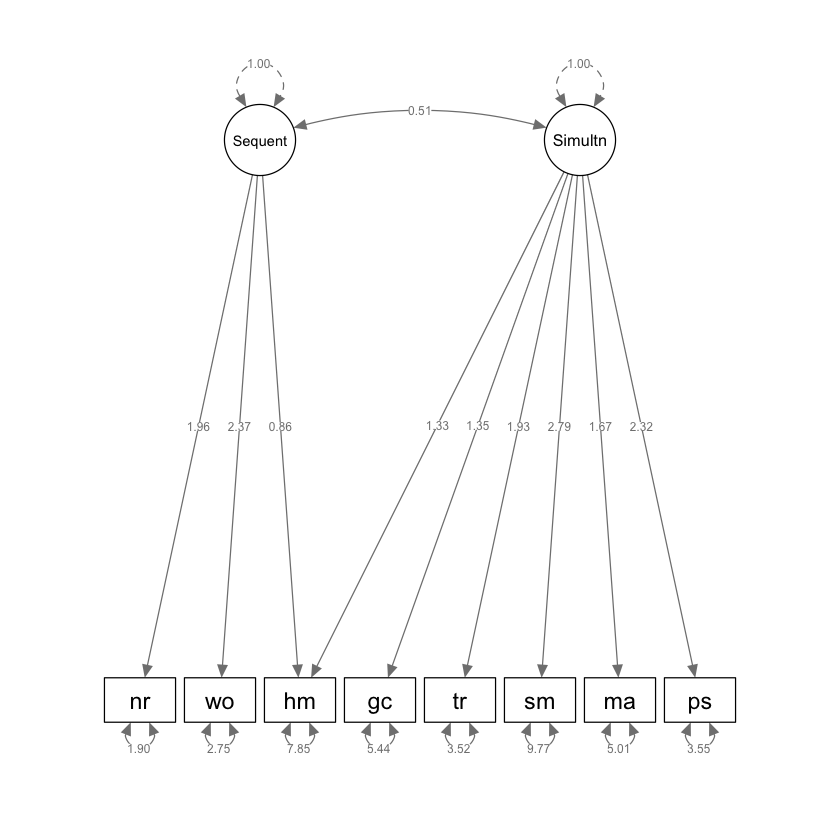

In [34]:
semPlot::semPaths(kabc3alt,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo la soluzione stanardizzata.

In [35]:
loadings <- standardizedSolution(kabc3alt)
loadings

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.2525843,0.08220772,3.072513,2.122649e-03,0.09146008,0.4137084
Sequent,=~,nr,0.8177223,0.05332042,15.336006,0.000000e+00,0.71321623,0.9222284
Sequent,=~,wo,0.8193488,0.05332369,15.365569,0.000000e+00,0.71483633,0.9238614
Simultan,=~,hm,0.3911092,0.07920463,4.937959,7.894445e-07,0.23587098,0.5463474
Simultan,=~,gc,0.4995384,0.06083464,8.211414,2.220446e-16,0.38030467,0.6187721
Simultan,=~,tr,0.7173674,0.04430383,16.191995,0.000000e+00,0.63053351,0.8042013
Simultan,=~,sm,0.6659822,0.04841876,13.754631,0.000000e+00,0.57108320,0.7608813
Simultan,=~,ma,0.5978175,0.05378959,11.114002,0.000000e+00,0.49239189,0.7032432
Simultan,=~,ps,0.7766261,0.03976255,19.531596,0.000000e+00,0.69869292,0.8545593


In [36]:
relevant_loadings <- loadings[loadings$op == "=~", c("lhs", "rhs", "est.std")]
relevant_loadings

,lhs,rhs,est.std
,<chr>,<chr>,<dbl>
1,Sequent,hm,0.2525843
2,Sequent,nr,0.8177223
3,Sequent,wo,0.8193488
4,Simultan,hm,0.3911092
5,Simultan,gc,0.4995384
6,Simultan,tr,0.7173674
7,Simultan,sm,0.6659822
8,Simultan,ma,0.5978175
9,Simultan,ps,0.7766261


Idealmente, per sostenere l'ipotesi di validità convergente, un fattore dovrebbe spiegare almeno il 50% della varianza in ciascuno dei suoi indicatori continui, come sostengono Bagozzi e Yi (2012). Ciò implica che, per essere considerato adeguatamente rappresentativo del costrutto che intende misurare, tutti gli indicatori di un fattore dovrebbero mostrare che la maggior parte della loro varianza è spiegata dal fattore stesso. Un modo meno rigoroso ma ancora informativo per valutare la validità convergente è attraverso l'uso della Varianza Media Estratta (AVE), calcolata come la media dei quadrati dei carichi fattoriali standardizzati di tutti gli indicatori associati a un particolare fattore. Un valore AVE superiore a 0.50 indica che, in media, il fattore spiega più della metà della varianza degli indicatori rispetto alla varianza residua attribuibile agli errori di misurazione, come indicato da Hair et al. (2022).

Nell'ambito di un modello a due fattori, i risultati ottenuti dall'esempio in esame evidenziano alcune criticità in relazione al criterio più stringente: il modello non riesce a spiegare una variazione significativa (R^2 > 0.50) per quattro dei otto indicatori, ossia la metà di essi.  Tuttavia, se consideriamo l'AVE, i risultati migliorano leggermente per il fattore sequenziale, che spiega in media circa il 52% della varianza dei suoi tre indicatori (AVE = 0.517).

Nella pratica analitica reale, valori di R^2 inferiori a 0.50 sono spesso considerati accettabili. Comrey e Lee (1992) hanno proposto una scala di valutazione gradiente in cui un R^2 superiore a 0.50 è classificato come eccellente, mentre valori approssimativamente pari a 0.40, 0.30, 0.20 e 0.10 sono considerati molto buoni, buoni, sufficienti e scarsi, rispettivamente. Secondo queste linee guida più flessibili, i risultati per gli indicatori del modello CFA a due fattori della KABC-I sono classificati come "eccellenti" (R^2 > 0.50) per tre degli otto indicatori, nessuno è giudicato "scarso" (R^2 circa 0.10), e i rimanenti cinque indicatori presentano valori intermedi. È essenziale sottolineare che queste linee guida non dovrebbero essere applicate in modo indiscriminato in tutti i contesti di CFA o con tutti i tipi di indicatori. Gli indicatori continui, come i punteggi totali nell'esempio citato, tendono a mostrare carichi fattoriali più elevati rispetto agli indicatori ordinali, come quelli basati su scale di risposta tipo Likert. 

## Considerazioni Finali

L'analisi fattoriale confermativa (CFA) rappresenta uno strumento cruciale nell'ambito delle ricerche psicologiche e sociali, in quanto consente di esaminare modelli di misurazione riflessiva. In questi modelli, i fattori comuni agiscono come proxy per le variabili teoriche. La CFA richiede che il ricercatore definisca preventivamente aspetti critici del modello, come il numero di fattori, l'assegnazione degli indicatori ai fattori e gli schemi di covarianza degli errori.

Nei modelli CFA base, ciascun indicatore continuo è associato a un unico fattore e si presume che gli errori siano indipendenti, formando così una struttura unidimensionale. L'analisi di modelli con più fattori permette di verificare le ipotesi di validità convergente e discriminante.

È anche possibile esplorare modelli CFA che includono covarianze di errore o indicatori correlati a più fattori. Tuttavia, gestire tali modelli è più complesso, specialmente in termini di identificazione del modello. Problemi tecnici come la non convergenza delle soluzioni o risultati inammissibili sono più comuni nei campioni di dimensioni ridotte o quando i fattori sono definiti da soli due indicatori. L'aggiustamento del modello può diventare una sfida, considerata l'ampia varietà di modifiche potenziali.

Un'altra questione critica è rappresentata dai modelli CFA equivalenti, i quali possono produrre risultati simili nonostante le loro differenze strutturali. Per affrontare queste sfide efficacemente, è essenziale fondare l'analisi più su basi teoriche che su meri calcoli statistici. L'efficacia della CFA, quindi, dipende notevolmente dal contesto teorico e dalla competenza metodologica del ricercatore, essendo cruciale un'approfondita comprensione del dominio di studio per guidare l'analisi.

## Session Info

In [37]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0     
 [5] ggExtra_0.10.1    bayesplot_1.11.1  gridExtra_2.3     patchwork_1.2.0  
 [9] semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-17     psych_2.4.3      
[13] scales_1.3.0      markdown_1.12     knitr_1.45        lubridate_1.9.3  
[17] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[21] readr_2.1.5       tidyr_1.3.1       tibble_3.2.1      ggplot2_3.5.0    
[25] tidyvers